#  MACHINE LEARNING WATER POTABILITY

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.expand_frame_repr', True)

df = pd.read_csv('dataset/water_potability.csv')

print( "Colonne: ", list(df.columns), "\nSize: ", df.size)

Colonne:  ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'] 
Size:  32760


In [61]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


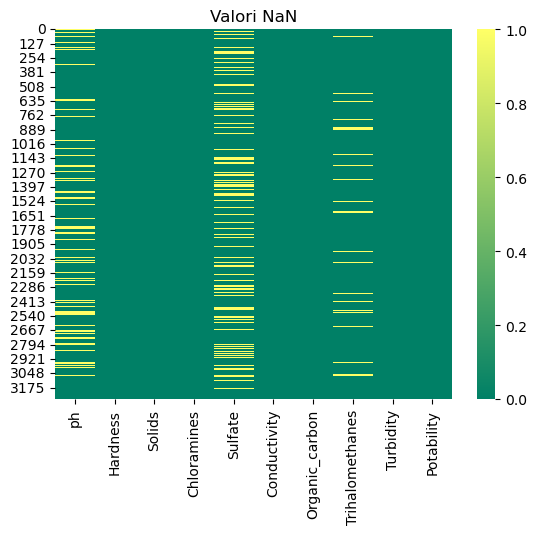

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [63]:
sns.heatmap(data=df.isnull(), cmap='summer')
plt.title("Valori NaN")
plt.show()
df.isnull().sum()

In [64]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2, weights='uniform', metric='nan_euclidean')
filled_value = imputer.fit_transform(df)

print(filled_value)

# df['ph'] = pd.Series(filled_value[:, 0])
# print(df, df['ph'])
# df['Sulfate'] = pd.Series(filled_value[:, 4])
# df['Trihalomethanes'] = pd.Series(filled_value[:, 7])


[[6.00742683e+00 2.04890455e+02 2.07913190e+04 ... 8.69909705e+01
  2.96313538e+00 0.00000000e+00]
 [3.71608008e+00 1.29422921e+02 1.86300579e+04 ... 5.63290763e+01
  4.50065627e+00 0.00000000e+00]
 [8.09912419e+00 2.24236259e+02 1.99095417e+04 ... 6.64200925e+01
  3.05593375e+00 0.00000000e+00]
 ...
 [9.41951032e+00 1.75762646e+02 3.31555782e+04 ... 6.98454003e+01
  3.29887550e+00 1.00000000e+00]
 [5.12676292e+00 2.30603758e+02 1.19838694e+04 ... 7.74882131e+01
  4.70865847e+00 1.00000000e+00]
 [7.87467136e+00 1.95102299e+02 1.74041771e+04 ... 7.86984463e+01
  2.30914906e+00 1.00000000e+00]]


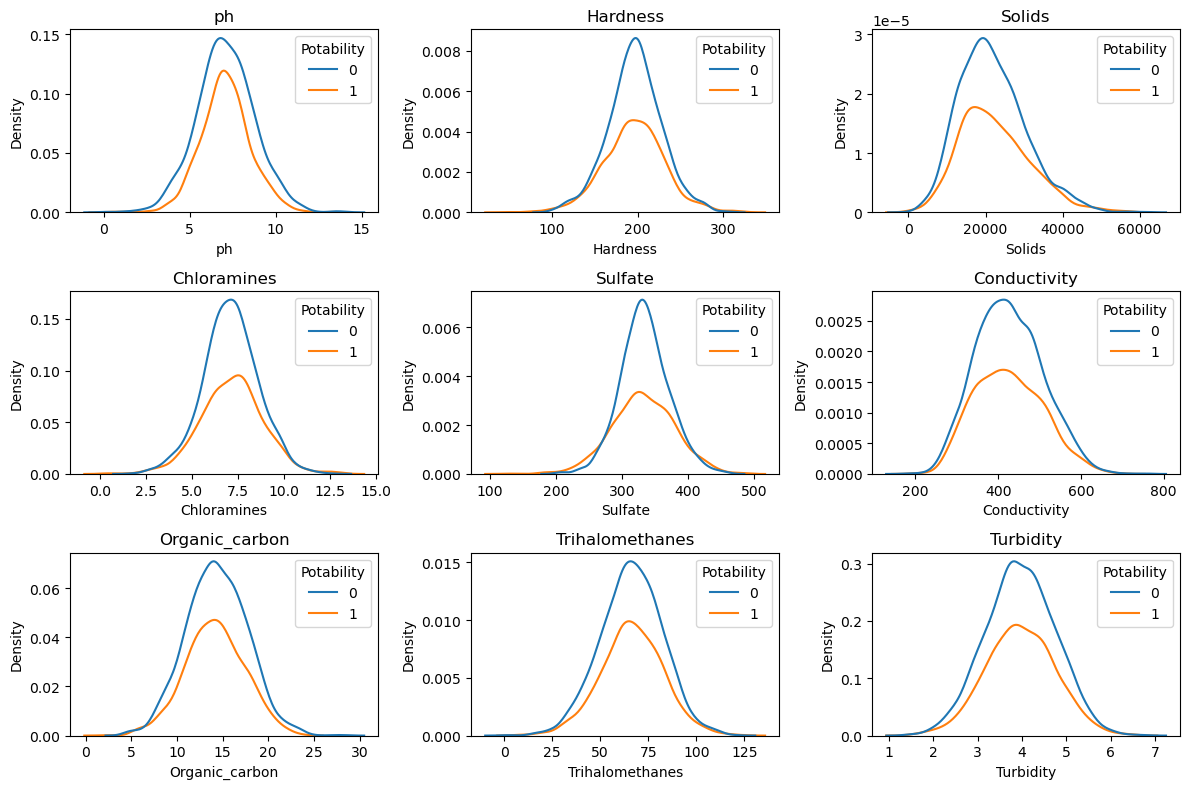

In [78]:
fig, axs = plt.subplots(3,3, figsize=(12,8))
df['Potability'] = df['Potability'].apply(str)
#ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,
# sns.boxplot(df, x='ph', y='Potability', ax=axs[0,0]).set(title='ph')
# sns.boxplot(df, x='Hardness', y='Potability', ax=axs[0,1]).set(title='Hardness')
# sns.boxplot(df, x='Solids', y='Potability', ax=axs[0,2]).set(title='Solids')
# sns.boxplot(df, x='Chloramines', y='Potability', ax=axs[1,0]).set(title='Chloramines')
# sns.boxplot(df, x='Sulfate', y='Potability', ax=axs[1,1]).set(title='Sulfate')
# sns.boxplot(df, x='Conductivity', y='Potability', ax=axs[1,2]).set(title='Conductivity')
# sns.boxplot(df, x='Organic_carbon', y='Potability', ax=axs[2,0]).set(title='Organic_carbon')
# sns.boxplot(df, x='Trihalomethanes', y='Potability', ax=axs[2,1]).set(title='Trihalomethanes')
# sns.boxplot(df, x='Turbidity', y='Potability', ax=axs[2,2]).set(title='Turbidity')

#sns.kdeplot(df, x='Trihalomethanes', hue='Potability', ax=axs[2,2], fill=True)

sns.kdeplot(df, x='ph', hue='Potability', ax=axs[0,0]).set(title='ph')
sns.kdeplot(df, x='Hardness', hue='Potability', ax=axs[0,1]).set(title='Hardness')
sns.kdeplot(df, x='Solids', hue='Potability', ax=axs[0,2]).set(title='Solids')
sns.kdeplot(df, x='Chloramines', hue='Potability', ax=axs[1,0]).set(title='Chloramines')
sns.kdeplot(df, x='Sulfate', hue='Potability', ax=axs[1,1]).set(title='Sulfate')
sns.kdeplot(df, x='Conductivity', hue='Potability', ax=axs[1,2]).set(title='Conductivity')
sns.kdeplot(df, x='Organic_carbon', hue='Potability', ax=axs[2,0]).set(title='Organic_carbon')
sns.kdeplot(df, x='Trihalomethanes', hue='Potability', ax=axs[2,1]).set(title='Trihalomethanes')
sns.kdeplot(df, x='Turbidity', hue='Potability', ax=axs[2,2]).set(title='Turbidity')


plt.tight_layout()
plt.show()
